# DBAC for mixed state, by adding a depolarising channel

Use a depolarizing model:

$$
\rho_{\text{mixed}} = (1 - p)\rho + p \cdot \frac{I}{2}
$$

where:

* $\rho$ is the pure density matrix,
* $p \in [0,1]$ is noise strength,
* $I/2$ is the maximally mixed qubit.

## 1. Initialization

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import sys
sys.path.append('..')
from functions.qite_gci import *
from functions.qite_dme import *
from functions.plot_bloch_sphere import *

# Plot config
plt.rcParams.update({
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'font.size': 16,
    'savefig.dpi': 75,
    'lines.linewidth': 2.0,
    'lines.markersize': 8,
    'legend.fontsize': 14,
    'legend.labelspacing': .3,
    'legend.columnspacing': .3,
    'legend.handletextpad': .1,
    'text.usetex': True,
    'font.family': "serif",
    'font.serif': "cm",
    'figure.figsize': [5, 3.5],
    'figure.autolayout': True
})

---
## 2. Compare Circuit A with/ without depolarising channel

In [43]:
optimal_s_Mk = np.load('optimal_s_Mk.npy')

In [44]:
import numpy as np

def apply_depolarising_channel(psi, p):
    """
    Apply a single-qubit depolarising channel to pure state |psi⟩.
    """
    # Projector for |psi><psi|
    rho_pure = np.outer(psi, np.conj(psi))

    # Depolarising channel
    rho = (1 - p) * rho_pure + p * np.eye(2) / 2
    return rho

In [45]:
# Ms = [1, 2]
Ms=[1]
k = 1
p=0.3

# Initial state sweep
thetas = np.linspace(0, 1, 100)
sigma_x = np.array([[0, 1], [1, 0]])
psis = [expm(-1j * np.pi/2 * sigma_x * t) @ np.array([[0], [1]]) for t in thetas]
psis = np.asarray(psis)


# Baseline GCI energy results
res_init = [GCI(initial_psi, psi, 1, np.linspace(0.01, 1, 2)).execute_gci()[0][-1] for psi in psis]

# Run DB-QITE for each M with optimal s
dict_res_DBQITE = {}
for M in Ms:
    res_DBQITE = [GCI(QITE_dme_select_M(M), psi, None, optimal_s_Mk[M-1][:k]).execute_gci()[0][-1] for psi in psis]
    dict_res_DBQITE[f'k={k}, M={M}, s = {np.round(optimal_s_Mk[M-1][:k], 2)}'] = res_DBQITE

# Ms = [1]
# k = 2
# for M in Ms:
#     res_DBQITE = [GCI(QITE_dme_select_M(M), psi, None, optimal_s_Mk[M-1][:k]).execute_gci()[0][-1] for psi in psis]
#     dict_res_DBQITE[f'k={k}, M={M}, s = {np.round(optimal_s_Mk[M-1][:k], 2)}'] = res_DBQITE
    
# # Compute fidelities: (1 - E)/2
dict_fid_RGCI = {key: [(1 - E) / 2 for E in values] for key, values in dict_res_DBQITE.items()}
# # Initial state fidelities and RGCI outputs
# fidelities_original = [fidelity_with_0(x) for x in psis]
# fidelity = [(1 - E) / 2 for E in res_init]

0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of inter

In [46]:
# Ms = [1, 2]
Ms=[1]
k = 1
p=0.3

# Initial state sweep
thetas = np.linspace(0, 1, 100)
sigma_x = np.array([[0, 1], [1, 0]])
psis = [expm(-1j * np.pi/2 * sigma_x * t) @ np.array([[0], [1]]) for t in thetas]
psis = [apply_depolarising_channel(psi,p) for psi in psis]
psis = np.asarray(psis)


# Baseline GCI energy results
res_init = [GCI(initial_psi, psi, 1, np.linspace(0.01, 1, 2)).execute_gci()[0][-1] for psi in psis]

# Run DB-QITE for each M with optimal s

for M in Ms:
    res_DBQITE = [GCI(QITE_dme_select_M(M), psi, None, optimal_s_Mk[M-1][:k]).execute_gci()[0][-1] for psi in psis]
    dict_res_DBQITE[f'k={k}, M={M}, s = {np.round(optimal_s_Mk[M-1][:k], 2)},p={p}'] = res_DBQITE

# Ms = [1]
# k = 2
# for M in Ms:
#     res_DBQITE = [GCI(QITE_dme_select_M(M), psi, None, optimal_s_Mk[M-1][:k]).execute_gci()[0][-1] for psi in psis]
#     dict_res_DBQITE[f'k={k}, M={M}, s = {np.round(optimal_s_Mk[M-1][:k], 2)},p={p}'] = res_DBQITE
    
# Compute fidelities: (1 - E)/2
dict_fid_RGCI = {key: [(1 - E) / 2 for E in values] for key, values in dict_res_DBQITE.items()}

0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of inter

c:\Python\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Python\Lib\site-packages\matplotlib\text.py:1477: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
c:\Python\Lib\site-packages\matplotlib\text.py:906: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
c:\Python\Lib\site-packages\matplotlib\text.py:763: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(y))


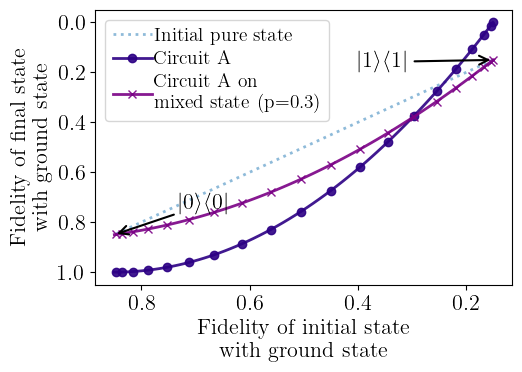

In [47]:
target_fidelity = 0.9

# Define reference state |0⟩⟨0|
state_0 = np.array([1, 0], dtype=complex)

# Fidelity with respect to |0⟩ for both pure and mixed states
def fidelity_with_0(state):
    return np.real(np.conj(state_0).T @ (state @ state.T.conj() if state.ndim == 2 and state.shape[1] == 1 else state) @ state_0)

fidelities_original = [fidelity_with_0(x) for x in psis]
fidelity = [(1-E)/2 for E in res_init]

# Plot setup
color = ['#2c0084', '#7a0085', '#006f7a', 'C0','#2c0084', '#7a0085', '#006f7a', 'C0']
markers = ['o','x','^','*','P','*','h']
max_ext_list = []
 
fig, ax = plt.subplots(figsize=(5.5, 4))
ax.plot(fidelities_original, fidelity, label="Initial pure state", alpha=0.5, linestyle=':')

# # Highlight three specific points
# plt.plot(fidelities_original[70], fidelity[70], 'o', color='C2', markersize=15, zorder=0)
# plt.plot(fidelities_original[55], fidelity[55], 's', color='C1', markersize=15, zorder=0)
# plt.plot(fidelities_original[20], fidelity[20], 'd', color='C3', markersize=15, zorder=0)

# circuit_name = ['Circuit A', 'Circuit B', 'Circuit C',f'Circuit A (p={p})', f'Circuit B (p={p})', f'Circuit C (p={p})']
circuit_name = ['Circuit A',f'Circuit A on\nmixed state (p={p})']

# Plot each RGCI curve and draw vertical line at max excitation fidelity above target
for i, (key, value) in enumerate(dict_fid_RGCI.items()):
    # max_ext = max_excitation(fidelities_original, np.real(value), target_fidelity)
    # if max_ext: ax.axvline(x=max_ext, ymax=0.2, color=color[i], alpha=0.8, linestyle='--')
    # max_ext_list.append(max_ext)
    ax.plot(fidelities_original, value, label=circuit_name[i], color=color[i],
            marker=markers[i], markevery=5, markersize=6, alpha=0.9)

# Reverse axes: higher overlap → left/lower corner
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
# ax.axhline(y=target_fidelity, color='k', alpha=0.6, linestyle='--', label=f'Target F = {target_fidelity}')

# Labels and legend
ax.set_xlabel('Fidelity of initial state\nwith ground state')
ax.set_ylabel('Fidelity of final state\nwith ground state')
ax.legend()

# Annotate |1⟩ and |0⟩ 
ax.annotate(r'$|1\rangle\langle 1|$', xy=(fidelities_original[0], fidelity[0]), 
            xytext=(fidelities_original[0]+0.25, fidelity[0]+0.03), arrowprops=dict(arrowstyle='->', lw=1.5))
ax.annotate(r'$|0\rangle\langle 0|$', xy=(fidelities_original[-1], fidelity[-1]), 
            xytext=(fidelities_original[-1]-0.12, fidelity[-1]-0.1), arrowprops=dict(arrowstyle='->', lw=1.5))

plt.tight_layout()
plt.savefig(f'plots/QITE_DME_k_{k}_M_fidelity_final_vs_original.pdf')

# Report max fidelity locations
for M, max_val in zip(Ms, max_ext_list):
    print((M, np.round(max_val, 2)))

In [48]:
color = ['C0','#2c0084','#7a0085','#006f7a']

In [49]:
states_good = GCI(QITE_dme_select_M(1), psis[70], None, optimal_s_Mk[0][:1]).execute_gci()[-3]
states_mid = GCI(QITE_dme_select_M(1), psis[55], None, optimal_s_Mk[0][:2]).execute_gci()[-3]
states_bad = GCI(QITE_dme_select_M(2), psis[30], None, optimal_s_Mk[1][:2]).execute_gci()[-3]

texts = ['Initial state',r'$k=1$',r'$k=2$']

0.0 0.5570332883715823 (0.42392678099636694+0j)
-0.1604459797621983 0.16044597976219818 (0.5790698231733963+1.0270944381409992e-17j)


c:\Python\Lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:3305: ComplexWarning: Casting complex values to real discards the imaginary part
  UVW = np.column_stack(input_args[3:]).astype(float)


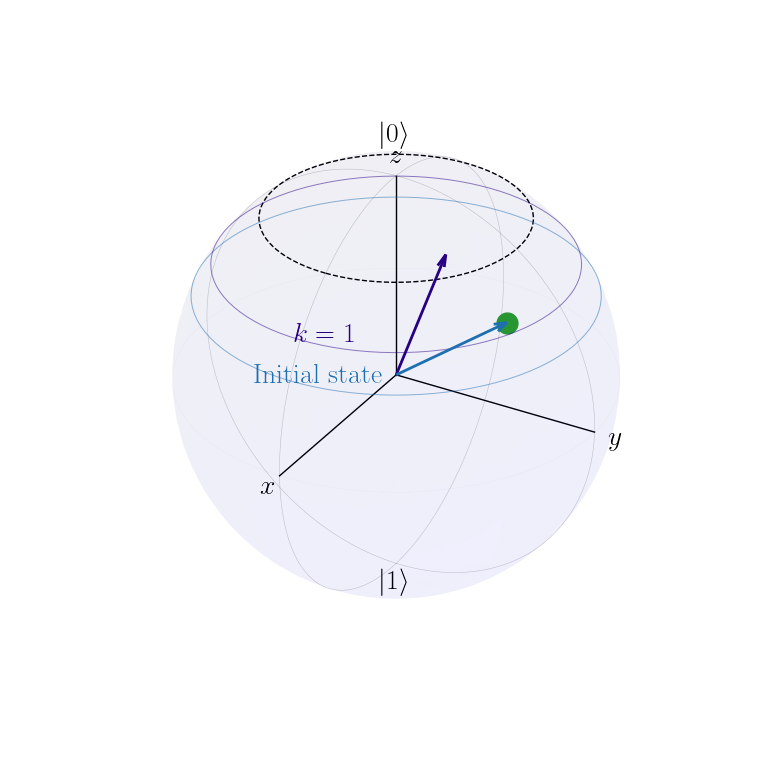

In [50]:
# Create the plot
ax = plot_bloch_sphere()

fidelity = 0.9
theta = 2 * np.arccos(np.sqrt(fidelity))
u = np.linspace(0, 2 * np.pi, 100)
x_latitude = np.outer(np.cos(u), np.sin(theta))
y_latitude = np.outer(np.sin(u), np.sin(theta))
z_latitude = np.outer(np.ones(np.size(u)), np.cos(theta))
ax.plot(x_latitude, y_latitude, z_latitude, color='k', lw=1, alpha=1,linestyle='--')

# Plot the Bloch sphere with vector
i=0
for state in states_good:
    if i==0:
        ax = plot_bloch_vector(state,ax,color=color[i],text=texts[i],marker='o',marker_color='C2')
    else:
        ax = plot_bloch_vector(state,ax,color=color[i],text=texts[i])
    i+=1
# Show the plot
plt.savefig(f'plots/bloch_good.pdf', bbox_inches="tight", pad_inches=-1.1)
plt.show()

---
## 3. Older code, that plot it with different k and M

In [51]:
optimal_s_Mk = np.load('optimal_s_Mk.npy')

In [52]:
Ms = [1, 2]
k = 1

# Initial state sweep
thetas = np.linspace(0, 1, 100)
sigma_x = np.array([[0, 1], [1, 0]])
psis = [expm(-1j * np.pi/2 * sigma_x * t) @ np.array([[0], [1]]) for t in thetas]
density_matrices = [psi @ psi.conj().T for psi in psis]
p = 0.3  # noise strength
I = np.eye(2) / 2
mixed_states = [(1 - p) * rho + p * I for rho in density_matrices]
psis = np.asarray(mixed_states)

# Baseline GCI energy results
res_init = [GCI(initial_psi, psi, 1, np.linspace(0.01, 1, 2)).execute_gci()[0][-1] for psi in psis]

# Run DB-QITE for each M with optimal s
dict_res_DBQITE = {}
for M in Ms:
    res_DBQITE = [GCI(QITE_dme_select_M(M), psi, None, optimal_s_Mk[M-1][:k]).execute_gci()[0][-1] for psi in psis]
    dict_res_DBQITE[f'M={np.round(M,2)}'] = res_DBQITE

    print(f"M = {M}, k = {k}: s = {np.round(optimal_s_Mk[M-1][:k], 2)}, φ = {np.round(np.sqrt(optimal_s_Mk[M-1][:k]), 2)}")
    print(f"t = {np.round(np.sqrt(optimal_s_Mk[M-1][:k]) / (2 * np.pi * M), 4)} τ")

# Compute fidelities: (1 - E)/2
dict_fid_RGCI = {key: [(1 - E) / 2 for E in values] for key, values in dict_res_DBQITE.items()}

0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of interval reached
0 0 0.01 --- Warning edge of inter

(1, np.float64(0.85))
(2, np.float64(0.85))


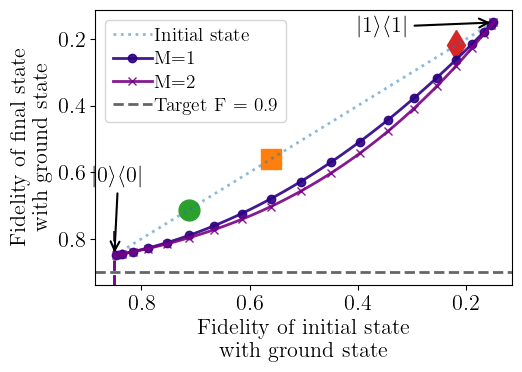

In [53]:
target_fidelity = 0.9

# Define reference state |0⟩⟨0|
state_0 = np.array([1, 0], dtype=complex)

# Fidelity with respect to |0⟩ for both pure and mixed states
def fidelity_with_0(state):
    return np.real(np.conj(state_0).T @ (state @ state.T.conj() if state.ndim == 2 and state.shape[1] == 1 else state) @ state_0)

# Initial state fidelities and RGCI outputs
fidelities_original = [fidelity_with_0(x) for x in psis]
fidelity = [(1 - E) / 2 for E in res_init]

# Plot setup
color = ['#2c0084', '#7a0085', '#006f7a', 'C0']
markers = ['o','x','^','*','P','*','h']
max_ext_list = []
 
fig, ax = plt.subplots(figsize=(5.5, 4))
ax.plot(fidelities_original, fidelity, label="Initial state", alpha=0.5, linestyle=':')

# Highlight three specific points
plt.plot(fidelities_original[70], fidelity[70], 'o', color='C2', markersize=15, zorder=0)
plt.plot(fidelities_original[55], fidelity[55], 's', color='C1', markersize=15, zorder=0)
plt.plot(fidelities_original[20], fidelity[20], 'd', color='C3', markersize=15, zorder=0)

# Plot each RGCI curve and draw vertical line at max excitation fidelity above target
for i, (key, value) in enumerate(dict_fid_RGCI.items()):
    max_ext = max_excitation(fidelities_original, np.real(value), target_fidelity)
    if max_ext: ax.axvline(x=max_ext, ymax=0.2, color=color[i], alpha=0.8, linestyle='--')
    max_ext_list.append(max_ext)
    ax.plot(fidelities_original, value, label=key, color=color[i],
            marker=markers[i], markevery=5, markersize=6, alpha=0.9)

# Reverse axes: higher overlap → left/lower corner
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
ax.axhline(y=target_fidelity, color='k', alpha=0.6, linestyle='--', label=f'Target F = {target_fidelity}')

# Labels and legend
ax.set_xlabel('Fidelity of initial state\nwith ground state')
ax.set_ylabel('Fidelity of final state\nwith ground state')
ax.legend()

# Annotate |1⟩ and |0⟩ 
ax.annotate(r'$|1\rangle\langle 1|$', xy=(fidelities_original[0], fidelity[0]), 
            xytext=(fidelities_original[0]+0.25, fidelity[0]+0.03), arrowprops=dict(arrowstyle='->', lw=1.5))
ax.annotate(r'$|0\rangle\langle 0|$', xy=(fidelities_original[-1], fidelity[-1]), 
            xytext=(fidelities_original[-1]+0.04, fidelity[-1]-0.22), arrowprops=dict(arrowstyle='->', lw=1.5))

plt.tight_layout()
plt.savefig(f'plots/QITE_DME_k_{k}_M_fidelity_final_vs_original.pdf')

# Report max fidelity locations
for M, max_val in zip(Ms, max_ext_list):
    print((M, np.round(max_val, 2)))

### 2.2 k=2

In [54]:
Ms = [1, 2]
k = 2

# Run DB-QITE for each M with optimal s
dict_res_DBQITE = {}
for M in Ms:
    res_DBQITE = [GCI(QITE_dme_select_M(M), psi, None, optimal_s_Mk[M-1][:k]).execute_gci()[0][-1] for psi in psis]
    dict_res_DBQITE[f'M={np.round(M,2)}'] = res_DBQITE

    print(f"M = {M}, k = {k}: s = {np.round(optimal_s_Mk[M-1][:k], 2)}, φ = {np.round(np.sqrt(optimal_s_Mk[M-1][:k]), 2)}")
    print(f"t = {np.round(np.sqrt(optimal_s_Mk[M-1][:k]) / (2 * np.pi * M), 4)} τ")

# Compute fidelities: (1 - E)/2
dict_fid_RGCI = {key: [(1 - E) / 2 for E in values] for key, values in dict_res_DBQITE.items()}

M = 1, k = 2: s = [0.79 0.79], φ = [0.89 0.89]
t = [0.141 0.141] τ
M = 2, k = 2: s = [0.88 0.8 ], φ = [0.94 0.89]
t = [0.0745 0.071 ] τ


(1, np.float64(0.85))
(2, np.float64(0.85))


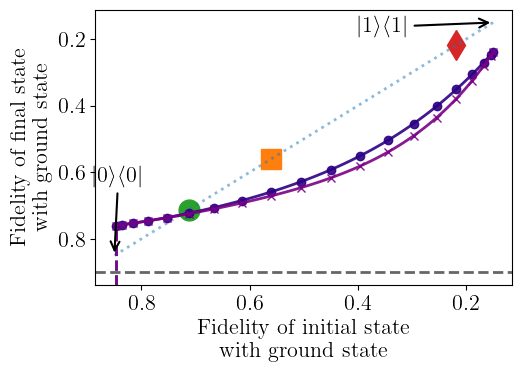

In [55]:
# Define reference state |0⟩⟨0|
state_0 = np.array([1, 0], dtype=complex)

# Fidelity with respect to |0⟩ for both pure and mixed states
def fidelity_with_0(state):
    return np.real(np.conj(state_0).T @ (state @ state.T.conj() if state.ndim == 2 and state.shape[1] == 1 else state) @ state_0)

# Initial state fidelities and RGCI outputs
fidelities_original = [fidelity_with_0(x) for x in psis]
fidelity = [(1 - E) / 2 for E in res_init]

# Plot setup
max_ext_list = []

fig, ax = plt.subplots(figsize=(5.5, 4))
ax.plot(fidelities_original, fidelity, label="Initial state", alpha=0.5, linestyle=':')

# Highlight three specific points
plt.plot(fidelities_original[70], fidelity[70], 'o', color='C2', markersize=15, zorder=0)
plt.plot(fidelities_original[55], fidelity[55], 's', color='C1', markersize=15, zorder=0)
plt.plot(fidelities_original[20], fidelity[20], 'd', color='C3', markersize=15, zorder=0)

# Plot each RGCI curve and draw vertical line at max excitation fidelity above target
for i, (key, value) in enumerate(dict_fid_RGCI.items()):
    max_ext = max_excitation(fidelities_original, np.real(value), target_fidelity)
    if max_ext: ax.axvline(x=max_ext, ymax=0.2, color=color[i], alpha=0.8, linestyle='--')
    max_ext_list.append(max_ext)
    ax.plot(fidelities_original, value, label=key, color=color[i],
            marker=markers[i], markevery=5, markersize=6, alpha=0.9)

# Reverse axes: higher overlap → left/lower corner
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
ax.axhline(y=target_fidelity, color='k', alpha=0.6, linestyle='--', label=f'Target F = {target_fidelity}')

# Labels and legend
ax.set_xlabel('Fidelity of initial state\nwith ground state')
ax.set_ylabel('Fidelity of final state\nwith ground state')

# Annotate |1⟩ and |0⟩ 
ax.annotate(r'$|1\rangle\langle 1|$', xy=(fidelities_original[0], fidelity[0]), 
            xytext=(fidelities_original[0]+0.25, fidelity[0]+0.03), arrowprops=dict(arrowstyle='->', lw=1.5))
ax.annotate(r'$|0\rangle\langle 0|$', xy=(fidelities_original[-1], fidelity[-1]), 
            xytext=(fidelities_original[-1]+0.04, fidelity[-1]-0.22), arrowprops=dict(arrowstyle='->', lw=1.5))

plt.tight_layout()
plt.savefig(f'plots/QITE_DME_k_{k}_M_fidelity_final_vs_original.pdf')

# Report max fidelity locations
for M, max_val in zip(Ms, max_ext_list):
    print((M, np.round(max_val, 2)))

---
## 4. Plot Bloch sphere for different initialization


Illustration of DB-QITE for different initializations, comparing cases where the initial state is close to or far from the ground state. The dotted black latitude line represents the target fidelity with the ground state, $F_{\text{target}}=0.9$. Each latitude line corresponds to the state indicated by the arrow of the same color, showing both the initial state and its evolution after $k=1$ or $k=2$ steps.
    


### (a) The initial state has a fidelity of $F_{\text{initial}}=80\%$ with the ground state. The target fidelity is achieved after $k=1$ step with $M=1$, requiring only one extra copy of the initial state.

In [56]:
color = ['C0','#2c0084','#7a0085','#006f7a']

In [57]:
states_good = GCI(QITE_dme_select_M(1), psis[70], None, optimal_s_Mk[0][:1]).execute_gci()[-3]
states_mid = GCI(QITE_dme_select_M(1), psis[55], None, optimal_s_Mk[0][:2]).execute_gci()[-3]
states_bad = GCI(QITE_dme_select_M(2), psis[30], None, optimal_s_Mk[1][:2]).execute_gci()[-3]

texts = ['Initial state',r'$k=1$',r'$k=2$']

0.0 0.5570332883715823 (0.42392678099636694+0j)
-0.1604459797621983 0.16044597976219818 (0.5790698231733963+1.0270944381409992e-17j)


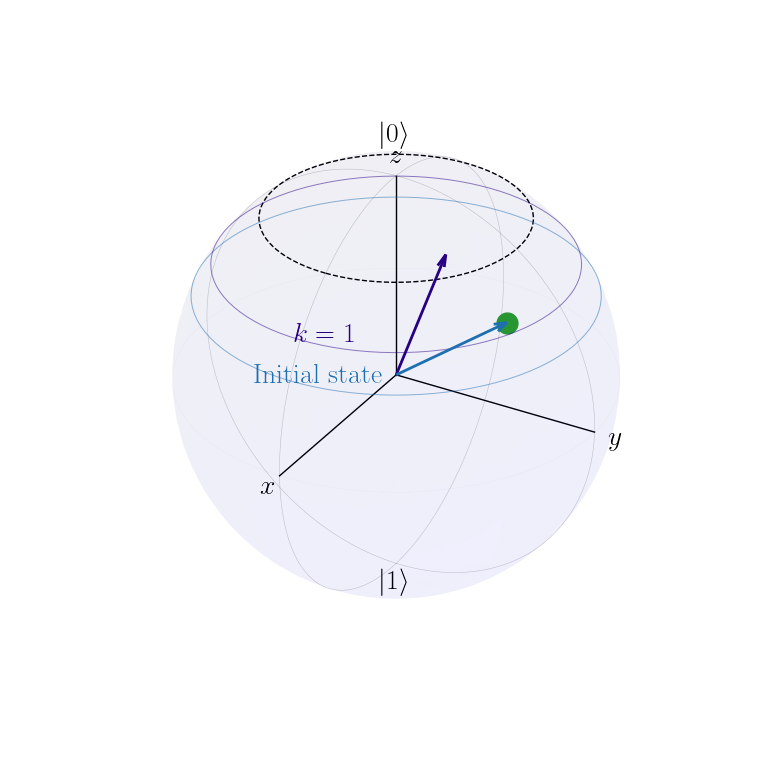

In [58]:
# Create the plot
ax = plot_bloch_sphere()

fidelity = 0.9
theta = 2 * np.arccos(np.sqrt(fidelity))
u = np.linspace(0, 2 * np.pi, 100)
x_latitude = np.outer(np.cos(u), np.sin(theta))
y_latitude = np.outer(np.sin(u), np.sin(theta))
z_latitude = np.outer(np.ones(np.size(u)), np.cos(theta))
ax.plot(x_latitude, y_latitude, z_latitude, color='k', lw=1, alpha=1,linestyle='--')

# Plot the Bloch sphere with vector
i=0
for state in states_good:
    if i==0:
        ax = plot_bloch_vector(state,ax,color=color[i],text=texts[i],marker='o',marker_color='C2')
    else:
        ax = plot_bloch_vector(state,ax,color=color[i],text=texts[i])
    i+=1
# Show the plot
plt.savefig(f'plots/bloch_good.pdf', bbox_inches="tight", pad_inches=-1.1)
plt.show()

### (b) The initial fidelity with the ground state is $F_{\text{initial}} = 60\%$. The target fidelity is reached after $k=2$ steps with $M=2$, which consumes eight extra copies of the initial state.

0.0 0.6893654271085456 (0.12155372436685119+0j)
-0.30278524599687856 0.30278524599687845 (0.35916607041312515-6.481027389270836e-18j)
-0.1652159357370075 -4.85722573273506e-17 (0.31846280681273975-5.202928501169502e-19j)


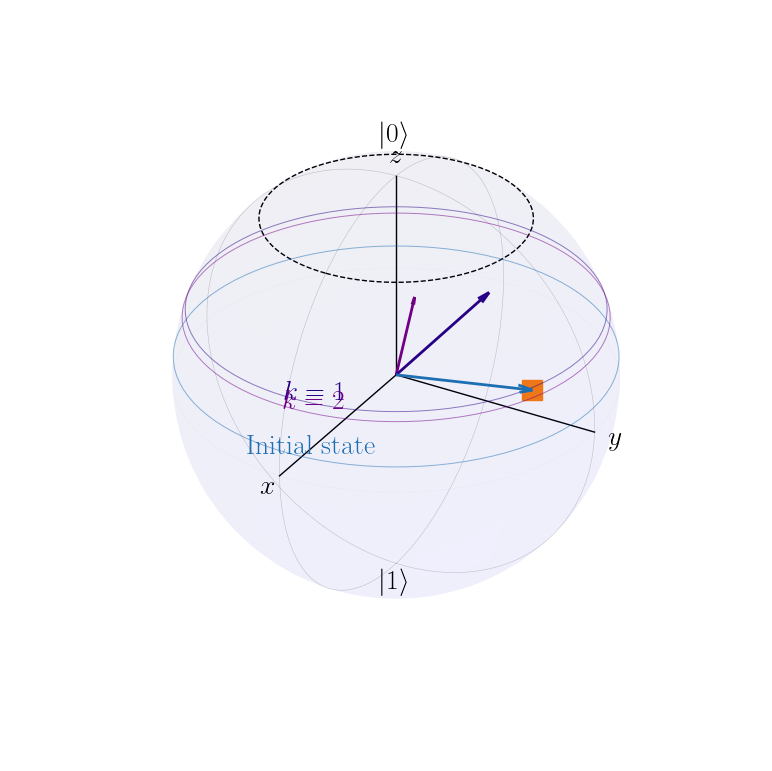

In [59]:
# Create the plot
ax = plot_bloch_sphere()

fidelity = 0.9
theta = 2 * np.arccos(np.sqrt(fidelity))
u = np.linspace(0, 2 * np.pi, 100)
x_latitude = np.outer(np.cos(u), np.sin(theta))
y_latitude = np.outer(np.sin(u), np.sin(theta))
z_latitude = np.outer(np.ones(np.size(u)), np.cos(theta))
ax.plot(x_latitude, y_latitude, z_latitude, color='k', lw=1, alpha=1,linestyle='--')


# Plot the Bloch sphere with vector
i=0
for state in states_mid:
    if i==0:
        ax = plot_bloch_vector(state,ax,color=color[i],text=texts[i],marker='s',marker_color='C1')
    else:
        ax = plot_bloch_vector(state,ax,color=color[i],text=texts[i])
    i+=1
# Show the plot
plt.savefig(f'plots/bloch_mid.pdf', bbox_inches="tight", pad_inches=-1.1)
plt.show()


### (c) The initial state is far from the ground state, with $F_{\text{initial}} = 10\%$. In this case, the target fidelity cannot be reached within $k=2$ steps and $M=2$.

0.0 0.5702031664352349 (-0.4060398366998388+0j)
-0.36447185714260466 0.450661049895879 (-0.1815883713263699+1.2593659391165426e-17j)
-0.33177261609668407 0.16097978210899594 (-0.018852654902680954-1.471706938912749e-18j)


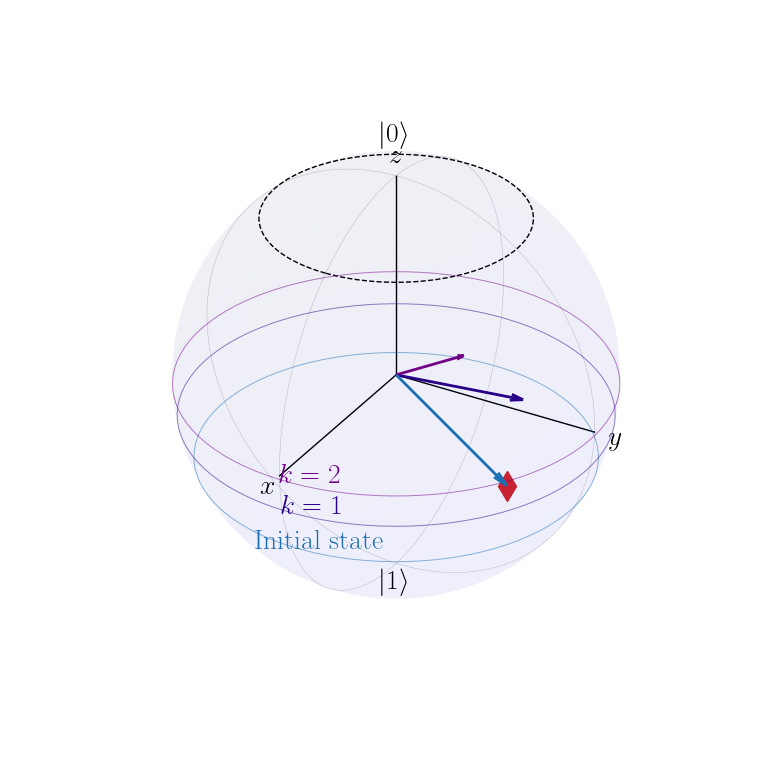

In [60]:
# Create the plot
ax = plot_bloch_sphere()

fidelity = 0.9
theta = 2 * np.arccos(np.sqrt(fidelity))
u = np.linspace(0, 2 * np.pi, 100)
x_latitude = np.outer(np.cos(u), np.sin(theta))
y_latitude = np.outer(np.sin(u), np.sin(theta))
z_latitude = np.outer(np.ones(np.size(u)), np.cos(theta))
ax.plot(x_latitude, y_latitude, z_latitude, color='k', lw=1, alpha=1,linestyle='--')

# Plot the Bloch sphere with vector
i=0
for state in states_bad:
    if i==0:
        ax = plot_bloch_vector(state,ax,color=color[i],text=texts[i],marker='d',marker_color='C3')
    else:
        ax = plot_bloch_vector(state,ax,color=color[i],text=texts[i])
    i+=1
# Show the plot
plt.savefig(f'plots/bloch_bad.pdf', bbox_inches="tight", pad_inches=-1.1)
plt.show()
